In [1]:

import numpy as np
import miniball
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge
from ML2_lib import DC_SGD

In [2]:
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c)


  0%|          | 0/10 [00:00<?, ?it/s]

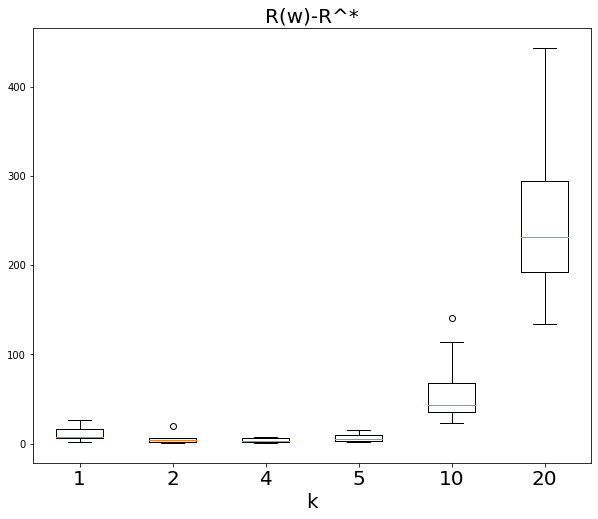

In [3]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [4]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,11.575337,5.527503,3.967069,6.619136,59.795404,251.755962
std,7.427213,5.262612,2.512253,4.933299,38.727974,96.118462
min,2.384973,1.284902,0.796760,1.405331,23.444103,134.700557
25%,6.671452,2.484134,2.156140,2.801229,35.043472,192.865438
50%,7.916485,4.047886,2.885754,4.919646,43.593451,232.143273
75%,16.899081,6.288509,6.207168,9.267539,68.385239,293.789140
max,26.105113,19.502932,7.858449,15.480914,141.418163,443.675967


In [5]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,16.899081,6.288509,6.207168,9.267539,68.385239,293.789140
0.80,17.762534,6.632064,6.768479,10.390805,81.619341,323.286532
0.90,19.601975,8.217253,7.347613,13.680371,116.434319,376.538568
0.95,22.853544,13.860093,7.603031,14.580642,128.926241,410.107267
0.99,25.454799,18.374364,7.807366,15.300859,138.919779,436.962227


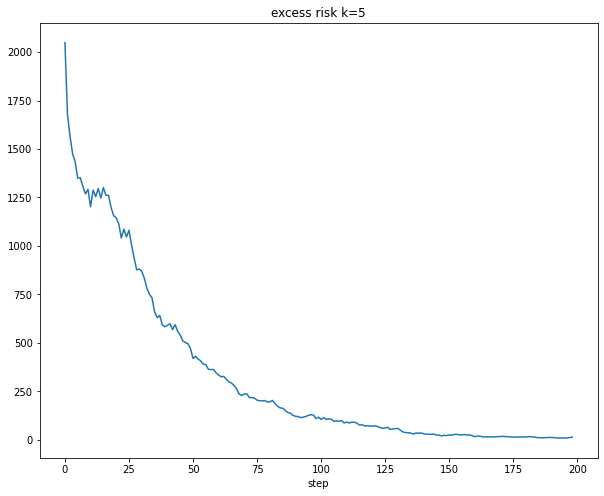

In [6]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [7]:
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c)


  0%|          | 0/10 [00:00<?, ?it/s]

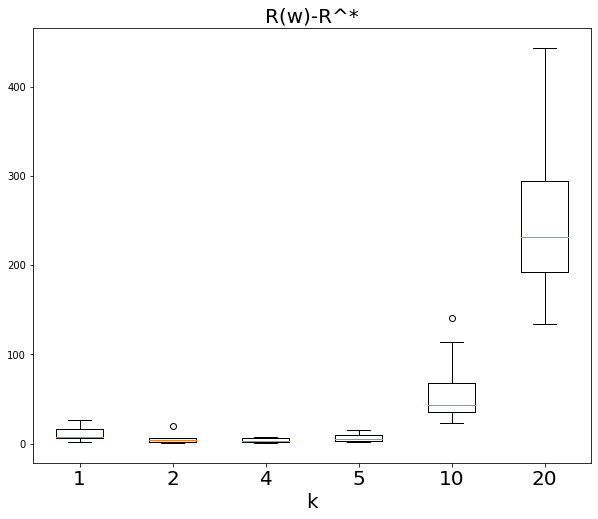

In [8]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [9]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,19697.387688,31977.038807,24098.483149,31217.266016,18576.127913,122360.153071
std,32165.076262,87667.471529,66402.872197,76458.460926,28427.741215,212859.939078
min,1099.315708,598.825405,976.123321,685.271102,1370.704425,2546.918716
25%,2395.012894,1412.509325,1312.100757,1528.852002,3932.796301,3766.310499
50%,3496.690422,2585.227432,2454.238148,2036.795036,8893.091410,18747.540363
75%,13214.712093,6370.279152,5286.218287,4897.755286,14679.216247,74147.394492
max,89852.158436,281056.066783,212967.020991,244875.594012,95811.822314,564233.313813


In [10]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,13214.712093,6370.279152,5286.218287,4897.755286,14679.216247,74147.394492
0.80,25696.642231,9264.723336,5908.455786,13591.127649,18268.087313,162375.606561
0.90,71252.532721,44097.948818,28473.022786,67939.462037,36998.257448,487151.284707
0.95,80552.345579,162577.007801,120720.021889,156407.528024,66405.039881,525692.299260
0.99,87992.195865,257360.254987,194517.621171,227181.980814,89930.465828,556525.110903


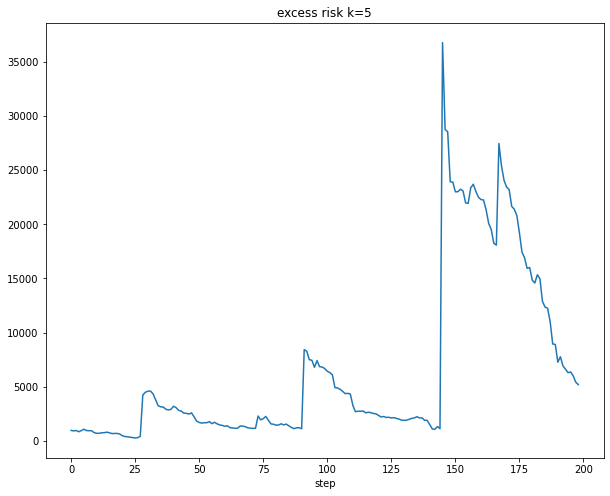

In [11]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()